# PMR3508 - Aprendizado de Máquina e Reconhecimento de Padrões (2024)

## *Terceiro Exercício-Programa*

O objetivo deste exercício é comparar diferentes *classificadores*, todos testados no mesmo conjunto de dados, a Base Adult

Nome: Lucas Carvalho

NUsp: 11850649

Hash: 105

### Preparação do Ambiente

In [113]:
# Biblitoecas Base
import pandas as pd
import matplotlib.pyplot as plt

# Modelos utilizados
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import GradientBoostingClassifier

# PCA
from sklearn.decomposition import PCA

# Comparar
import pandas as pd
from sklearn.metrics import f1_score

# Avaliação
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

## Importação e Tratamento dos Dados

### Importação

Primeiramente, importação dos dados, levando em consideração uma melhor nomenclatura de cada uma das Features, facilitando o entendimento do código

In [114]:
trainData = pd.read_csv(
    "./input/train_data.csv",
    na_values= '?',
    index_col= ['Id'],
    header= 0,
    names= [
        "Id",
        "Age",
        "Workclass",
        "Fnlwgt",
        "Education",
        "Education-num",
        "Marital-status",
        "Occupation",
        "Relationship",
        "Race",
        "Sex",
        "Capital-gain",
        "Capital-loss",
        "Hours-per-week",
        "Native-country",
        "Target"
    ]
)

testData = pd.read_csv(
    "./input/test_data.csv",
    na_values= '?',
    index_col= ['Id'],
    header= 0,
    names= [
        "Id",
        "Age",
        "Workclass",
        "Fnlwgt",
        "Education",
        "Education-num",
        "Marital-status",
        "Occupation",
        "Relationship",
        "Race",
        "Sex",
        "Capital-gain",
        "Capital-loss",
        "Hours-per-week",
        "Native-country"
    ]
)

### Tratamento

Como o objetivo é comparar classificadores, será considerado o mesmo tratamento de dados feito anteriormente em relação ao aplicado KNN. Nota-se que houve aplicação de diferentes encoders, assim como ordenação binária

In [115]:
# Preenchendo valores nulos em 'Workclass' e fazendo o mapeamento
trainData["Workclass"] = trainData["Workclass"].fillna("Private")
trainData["Workclass"] = trainData["Workclass"].apply(lambda x: 1 if x == "Private" else 0)
trainData.rename(columns={"Workclass": "isPrivate"}, inplace=True)

# Removendo valores nulos em 'Occupation' e criando variáveis dummies
trainData = trainData.dropna(subset=["Occupation"])
trainData = pd.concat([trainData, pd.get_dummies(trainData["Occupation"], prefix="Occ")], axis=1)
trainData = trainData.drop("Occupation", axis=1)

# Mapeando 'Native-country'
trainData["Native-country"] = trainData["Native-country"].apply(lambda x: 1 if x == "United-States" else 0)
trainData.rename(columns={"Native-country": "isFromUS"}, inplace=True)

# Criando variáveis dummies para 'Marital-status', 'Relationship', 'Race'
trainData = pd.concat([trainData, pd.get_dummies(trainData["Marital-status"], prefix="Mar")], axis=1)
trainData = trainData.drop("Marital-status", axis=1)

trainData = pd.concat([trainData, pd.get_dummies(trainData["Relationship"], prefix="Rel")], axis=1)
trainData = trainData.drop("Relationship", axis=1)

trainData = pd.concat([trainData, pd.get_dummies(trainData["Race"], prefix="Race")], axis=1)
trainData = trainData.drop("Race", axis=1)

# Mapeando 'Sex'
trainData["Sex"] = trainData["Sex"].apply(lambda x: 1.0 if x == "Male" else 0.0)
trainData.rename(columns={"Sex": "isMale"}, inplace=True)

# Mapeando 'Target'
trainData["Target"] = trainData["Target"].apply(lambda x: 1.0 if x == ">50K" else 0.0)

trainData_dummies = pd.get_dummies(trainData, drop_first=True)

Analogamente, com o conjunto de teste

In [116]:
# Preenchendo valores nulos em 'Workclass' e fazendo o mapeamento
testData["Workclass"] = testData["Workclass"].fillna("Private")
testData["Workclass"] = testData["Workclass"].apply(lambda x: 1 if x == "Private" else 0)
testData.rename(columns={"Workclass": "isPrivate"}, inplace=True)
# Removendo valores nulos em 'Occupation' e criando variáveis dummies
testData = testData.dropna(subset=["Occupation"])
testData = pd.concat([testData, pd.get_dummies(testData["Occupation"], prefix="Occ")], axis=1)
testData = testData.drop("Occupation", axis=1)

# Mapeando 'Native-country'
testData["Native-country"] = testData["Native-country"].apply(lambda x: 1 if x == "United-States" else 0)
testData.rename(columns={"Native-country": "isFromUS"}, inplace=True)

# Criando variáveis dummies para 'Marital-status', 'Relationship', 'Race'
testData = pd.concat([testData, pd.get_dummies(testData["Marital-status"], prefix="Mar")], axis=1)
testData = testData.drop("Marital-status", axis=1)

testData = pd.concat([testData, pd.get_dummies(testData["Relationship"], prefix="Rel")], axis=1)
testData = testData.drop("Relationship", axis=1)

testData = pd.concat([testData, pd.get_dummies(testData["Race"], prefix="Race")], axis=1)
testData = testData.drop("Race", axis=1)

# Mapeando 'Sex'
testData["Sex"] = testData["Sex"].apply(lambda x: 1.0 if x == "Male" else 0.0)
testData.rename(columns={"Sex": "isMale"}, inplace=True)

# Garantindo que as colunas do testData sejam as mesmas que o trainData
testData = testData.reindex(columns=trainData_dummies.columns, fill_value=0)

testData = testData.drop(columns=['Target'])

Mostrando o resultado do DataFrame após as operações indicadas

In [117]:
trainData

,Age,isPrivate,Fnlwgt,Education,Education-num,isMale,Capital-gain,Capital-loss,Hours-per-week,isFromUS,...,Rel_Not-in-family,Rel_Other-relative,Rel_Own-child,Rel_Unmarried,Rel_Wife,Race_Amer-Indian-Eskimo,Race_Asian-Pac-Islander,Race_Black,Race_Other,Race_White
Id,,,,,,,,,,,,,,,,,,,,,
16280,34,1,204991,Some-college,10,1.0,0,0,44,1,...,False,False,True,False,False,False,False,False,False,True
16281,58,0,310085,10th,6,1.0,0,0,40,1,...,False,False,False,False,False,False,False,False,False,True
16282,25,1,146117,Some-college,10,1.0,0,0,42,1,...,True,False,False,False,False,False,False,False,False,True
16283,24,1,138938,Some-college,10,0.0,0,0,40,1,...,True,False,False,False,False,False,False,False,False,True
16284,57,0,258883,HS-grad,9,1.0,5178,0,60,0,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48835,42,1,384236,Masters,14,1.0,7688,0,40,1,...,False,False,False,False,False,False,False,False,False,True
48836,23,1,129042,HS-grad,9,0.0,0,0,40,1,...,False,False,False,True,False,False,False,True,False,False
48837,30,1,195488,HS-grad,9,0.0,0,0,40,0,...,False,False,True,False,False,False,False,False,False,True


In [118]:
testData

,Age,isPrivate,Fnlwgt,Education-num,isMale,Capital-gain,Capital-loss,Hours-per-week,isFromUS,Occ_Adm-clerical,...,Education_9th,Education_Assoc-acdm,Education_Assoc-voc,Education_Bachelors,Education_Doctorate,Education_HS-grad,Education_Masters,Education_Preschool,Education_Prof-school,Education_Some-college
Id,,,,,,,,,,,,,,,,,,,,,
0,25,1,120596,13,1.0,0,0,44,1,False,...,0,0,0,0,0,0,0,0,0,0
1,64,0,152537,13,1.0,0,0,45,1,False,...,0,0,0,0,0,0,0,0,0,0
2,31,1,100135,14,0.0,0,0,40,1,False,...,0,0,0,0,0,0,0,0,0,0
3,45,1,189123,9,1.0,0,0,40,1,False,...,0,0,0,0,0,0,0,0,0,0
4,64,0,487751,13,1.0,0,0,50,1,False,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275,40,1,168113,9,1.0,0,0,40,1,False,...,0,0,0,0,0,0,0,0,0,0
16276,30,0,327203,9,1.0,0,0,40,1,False,...,0,0,0,0,0,0,0,0,0,0
16277,25,1,116358,9,1.0,0,0,40,0,True,...,0,0,0,0,0,0,0,0,0,0


#### Ajuste de Correlação

Como já foi feito e documentado, algumas features são menos relevantes, levando em conta que sua correlação é mais baixa, portanto, serão desprezadas.

In [119]:
# Definindo parâmetros
cvFolds = 5
minCorr = 0.1
scores = ("accuracy", "f1")

# Convertendo trainData para dummies e separando features e target
trainData_dummies = pd.get_dummies(trainData, drop_first=True)
trainY = trainData_dummies["Target"]
trainX = trainData_dummies.drop("Target", axis=1)

# Identificando colunas para remover, baseadas na correlação com "Target"
correlation = trainX.corrwith(trainY)
toRemove = correlation.where(correlation.abs() <= minCorr).dropna().index

# Remover as colunas filtradas
trainX.drop(toRemove, axis=1, inplace=True)

Em relação ao conjunto de teste, são feitas apenas as correções e separação para avaliação adequada

In [120]:
# Criando dummies e alinhando colunas com trainData
testData_dummies = pd.get_dummies(testData, drop_first=True)
testData_dummies = testData_dummies.reindex(columns=trainData_dummies.columns, fill_value=0)

# Separando as features (X) e o target (Y) em ambos os conjuntos de dados
trainX = trainData_dummies.drop("Target", axis=1)
trainY = trainData_dummies["Target"]
testX = testData_dummies.drop("Target", axis=1)
testY = testData_dummies["Target"]

## QDA

O QDA é uma técnica baseada na análise discriminante quadrática, que assume que as classes possuem distribuições normais, mas, ao contrário da Análise Discriminante Linear (LDA), permite matrizes de covariância distintas para cada classe. A decisão de classificar uma observação em uma classe específica depende de uma função quadrática, por isso o nome "quadrática".

### Características:

- Assumindo que cada classe tem sua própria matriz de covariância, QDA consegue capturar melhor as fronteiras entre classes não-lineares.

- É sensível a colinearidade (correlações fortes entre variáveis) e não é robusto a desbalanceamentos nas classes.

In [121]:
qda = QuadraticDiscriminantAnalysis()

Devido à dimensionalidad,e foi necessário aplicar PCA, para garantir uma dimensão menor de features para aplicar neste classificador, e garantir que funcione corretamente.

In [122]:
# Reduzindo a dimensionalidade com PCA para 95% da variância explicada
pca = PCA(n_components=2)
trainX_pca = pca.fit_transform(trainX)

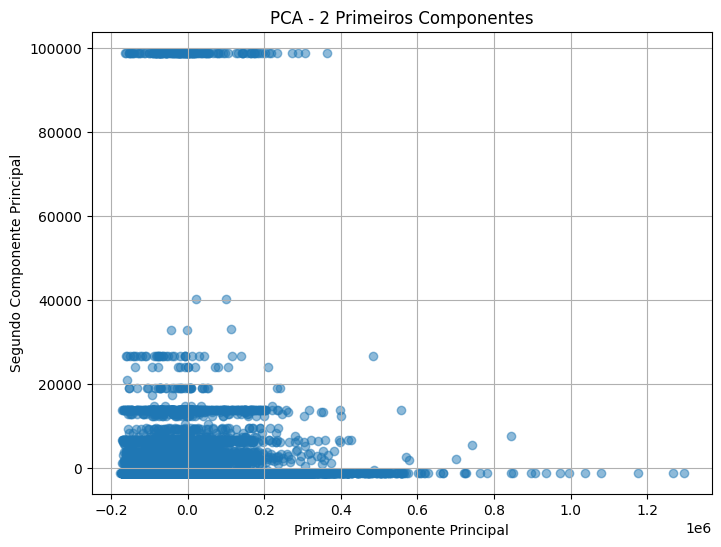

In [123]:
plt.figure(figsize=(8, 6))
plt.scatter(trainX_pca[:, 0], trainX_pca[:, 1], alpha=0.5)
plt.title('PCA - 2 Primeiros Componentes')
plt.xlabel('Primeiro Componente Principal')
plt.ylabel('Segundo Componente Principal')
plt.grid(True)
plt.show()

In [124]:
qda_score = cross_validate(qda, trainX_pca, trainY, cv=cvFolds, scoring=scores)
print(qda_score["test_accuracy"].mean())
print(qda_score["test_f1"].mean())

0.7838657186024743
0.32931127059416615


Como esperado, QDA não gera resultados tão satisfatórios, embora seja rápido

## Regressão Logística

A regressão logística é um modelo linear usado para classificação binária, onde a relação entre variáveis independentes e a probabilidade de pertencer a uma classe é modelada usando a função logística (ou sigmoide). Para classes múltiplas, a técnica se expande para uma abordagem de regressão logística multinomial.

### Características:

- É um modelo interpretável, com coeficientes que indicam a importância e direção das variáveis preditoras.

- Supõe uma relação linear entre as variáveis independentes e o logaritmo das odds de pertencer a uma classe.

In [125]:
# Treinando o modelo de Regressão Logística
log_reg = LogisticRegression(max_iter=300, random_state=42, penalty= "l1", solver= "liblinear")

In [126]:
log_reg_score = cross_validate(log_reg, trainX, trainY, cv= cvFolds, scoring= scores)
print(log_reg_score["test_accuracy"].mean())
print(log_reg_score["test_f1"].mean())

0.8447765855614792
0.6570217997599094


Resultados muito bons em regressão logística, com uma boa margem de acertos

## Naive Bayes

O Naive Bayes é baseado no teorema de Bayes e supõe que todas as variáveis preditoras são independentes entre si (suposição ingênua). Existem variações do Naive Bayes para diferentes distribuições de dados, como o Gaussian Naive Bayes para variáveis contínuas, Multinomial Naive Bayes para contagens, e Bernoulli Naive Bayes para variáveis binárias.

### Características:

- É muito rápido, especialmente para grandes conjuntos de dados.

- A suposição de independência entre variáveis é frequentemente irrealista, mas ainda assim o modelo pode ser eficaz.

- Funciona bem em problemas de classificação de texto, como filtragem de spam, onde a independência entre palavras é assumida.

In [127]:
gnb = GaussianNB()

In [128]:
gnb_score = cross_validate(gnb, trainX, trainY, cv=cvFolds, scoring=scores)
print(gnb_score["test_accuracy"].mean())
print(gnb_score["test_f1"].mean())

0.7884885118647919
0.42233030837357954


Novamente, como Naive-Bayes é um classificador mais simples, não era esperado grandes resultados, embora tenha contemplado

## Floresta Aleatória

Random Forest é um conjunto de árvores de decisão (bagging) em que várias árvores são treinadas em subconjuntos aleatórios dos dados, e a média das previsões dessas árvores é usada para a classificação final. Cada árvore é treinada usando amostras de dados selecionadas aleatoriamente (com substituição), e um subconjunto de variáveis é considerado a cada divisão.

### Características:

- Menos sensível ao sobreajuste do que uma única árvore de decisão.

- Consegue capturar interações complexas entre variáveis.

- Relativamente robusto a colinearidade e a outliers.

O primeiro passo é encontrar, com cross-validation, a profundidade adequada

In [129]:
# bestScoreRF = 0
# for depth in range(3, 20, 2):
#     rndForest = RandomForestClassifier(n_estimators= 300, max_depth= depth)
#     rndForestScore = cross_val_score(rndForest, trainX, trainY, cv= cvFolds)
#     if rndForestScore.mean() > bestScoreRF:
#         bestScoreRF = rndForestScore.mean()
#         bestDepth = depth
# print("\nbestD = " + str(bestDepth) + " and bestScore = " + str(bestScoreRF))

*bestD = 13 and bestScore = 0.8625307125307125*

Em seguida, a melhor quantidade de árvores

In [130]:
# bestScoreRF = 0
# for nTree in range(10, 101):
#     rndForest = RandomForestClassifier(n_estimators= nTree, max_depth= bestDepth)
#     rndForestScore = cross_val_score(rndForest, trainX, trainY, cv= cvFolds)
#     if rndForestScore.mean() > bestScoreRF:
#         bestScoreRF = rndForestScore.mean()
#         bestNTree = nTree
# print("\nbestN = " + str(bestNTree) + " and bestScore = " + str(bestScoreRF))

*bestN = 62 and bestScore = 0.8627149877149878*

In [131]:
bestDepth = 13
bestNTree = 62

rf_classifier = RandomForestClassifier(n_estimators= bestNTree, max_depth= bestDepth)

In [132]:
rf_classifier_score = cross_validate(rf_classifier, trainX, trainY, cv= cvFolds, scoring= scores)
print(rf_classifier_score["test_accuracy"].mean())
print(rf_classifier_score["test_f1"].mean())

0.8568869991758913
0.6665108398409358


Após uma boa busca exploratória, o modelo se ajustou bem e gerou um óitmo resultado

## Boosting

Boosting é uma técnica de ensemble em que modelos fracos (geralmente árvores de decisão de pequena profundidade) são treinados sequencialmente. Cada modelo seguinte tenta corrigir os erros dos anteriores, atribuindo maior peso aos erros para reduzir seu impacto. O resultado final é uma combinação ponderada desses modelos fracos, formando um modelo forte.

### Características:

- Altamente flexível, permite ajustar muitos hiperparâmetros para obter o melhor desempenho.
- Pode ser sensível ao sobreajuste, embora técnicas como early stopping e regularização possam ajudar a mitigar isso.
- É computacionalmente mais caro do que bagging (como Random Forest) e requer mais tempo de treinamento.

In [133]:
gb_classifier = GradientBoostingClassifier(random_state=42)

In [ ]:
gb_classifier_score = cross_validate(gb_classifier, trainX, trainY, cv= cvFolds, scoring= scores)

print(gb_classifier_score["test_accuracy"].mean())
print(gb_classifier_score["test_f1"].mean())

0.8599146767662379
0.6831887045333079


Como esperado, o melhor classificador obtido

## Análise dos Classificadores

Com isso, é possível comparar os resultados obtidos para cada um dos classificadores

In [135]:
# Dicionário com os resultados de accuracy e F1 de cada classificador
results = {
    'QDA': [qda_score["test_accuracy"].mean(), qda_score["test_f1"].mean()],
    'Logistic Regression': [log_reg_score["test_accuracy"].mean(), log_reg_score["test_f1"].mean()],
    'Naive Bayes': [gnb_score["test_accuracy"].mean(), gnb_score["test_f1"].mean()],
    'Random Forest': [rf_classifier_score["test_accuracy"].mean(), rf_classifier_score["test_f1"].mean()],
    'Gradient Boosting': [gb_classifier_score["test_accuracy"].mean(), gb_classifier_score["test_f1"].mean()]
}

# Criando um DataFrame a partir dos resultados
scores_df = pd.DataFrame(results, index=['Score', 'F1']).T
print("Tabela de Score e F1 de cada classificador:\n", scores_df)

Tabela de Score e F1 de cada classificador:
                         Score        F1
QDA                  0.783866  0.329311
Logistic Regression  0.844777  0.657022
Naive Bayes          0.788489  0.422330
Random Forest        0.856887  0.666511
Gradient Boosting    0.859915  0.683189


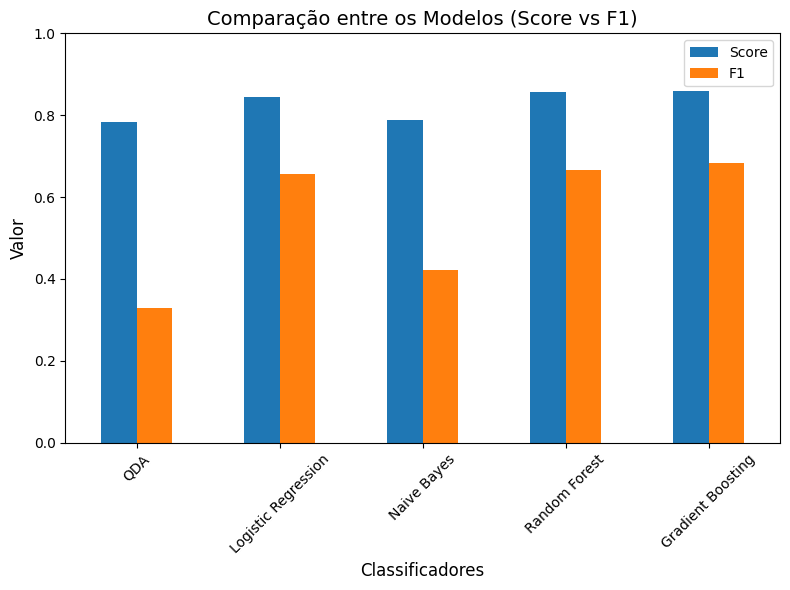

In [136]:
# Plotando os resultados
fig, ax = plt.subplots(figsize=(8, 6))

scores_df.plot(kind='bar', ax=ax)
ax.set_title('Comparação entre os Modelos (Score vs F1)', fontsize=14)
ax.set_ylabel('Valor', fontsize=12)
ax.set_xlabel('Classificadores', fontsize=12)
ax.set_ylim(0, 1)  # Limitar os valores entre 0 e 1
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

O melhor, como esperado, é aquela baseado em boosting, que será, portanto, escolhido

In [137]:
gb_classifier.fit(trainX, trainY)

GradientBoostingClassifier(random_state=42)

In [138]:
guess = gb_classifier.predict(testData)

In [139]:
submission = pd.DataFrame({
    "income": guess
}, index=testData.index)

# Cast the 'income' column to type 'object' to avoid the warning
submission["income"] = submission["income"].astype(object)

# Assign string values based on the income
submission.loc[submission["income"] == 0, "income"] = "<=50K"
submission.loc[submission["income"] == 1, "income"] = ">50K"

# Save the DataFrame to a CSV file
submission.to_csv("submission.csv", index=True)

In [140]:
submission

,income
Id,
0,<=50K
1,>50K
2,<=50K
3,<=50K
4,>50K
...,...
16275,<=50K
16276,<=50K
16277,<=50K
